In [90]:
# by Joh Schöneberg 2018

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

import math

#import cv2
import pims
from PIL import Image

import skimage

import json

#own modules / functions
import sys

sys.path.append("./modules")
import TiffProcessing as tiffproc
import InputProcessing as inproc
sys.path.append("./classes")
import Track

# input data

In [91]:
inputParameters = pd.read_csv('../_inputParameters.csv',names=['key','value'])


inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")
ch0_outputDataFolder  = inproc.getInputParameter(inputParameters,"ch0_outputDataFolder")
ch0_trackingCsvFilename = inproc.getInputParameter(inputParameters,"ch0_trackingCsvFilename")

ch0_trackingCsvFilenameProcessed = inproc.getInputParameter(inputParameters,"ch0_trackingCsvFilenameProcessed")
ch1_outputDataFolder  = inproc.getInputParameter(inputParameters,"ch1_outputDataFolder")
ch1_trackingCsvFilename = inproc.getInputParameter(inputParameters,"ch1_trackingCsvFilename")

ch0_uniqueFilenameString = inproc.getInputParameter(inputParameters,"ch0_uniqueFilenameString")
ch1_uniqueFilenameString = inproc.getInputParameter(inputParameters,"ch1_uniqueFilenameString")


ch0_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"ch0_trackingProcessedBildFilename")
ch1_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"ch1_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))


In [92]:
# read the raw csv data for further processing

path = outputDataFolder+'/'+ch0_trackingCsvFilenameProcessed
print(path)

data = pd.read_csv(path,header=0)
data.columns = ["trackId","tracklength","time[s]","frameId","x",'y',"z","A","c","lifetime","catIdx","pval_Ar"]
trackIds = data.drop_duplicates(subset='trackId')['trackId'].values

data[0:5]




/Users/johannesschoeneberg/git/LatticeTrack/data/test_input/crop_100x100x100/output/trackedFeaturesProcessed.csv


,trackId,tracklength,time[s],frameId,x,y,z,A,c,lifetime,catIdx,pval_Ar
0,1,79,0,1,7.904661e+01,6.464731e+01,8.131298e+01,2.380362e+04,5.097926e+03,398.23,8,0.0
1,1,79,5.689000e+00,2,7.850739e+01,6.542015e+01,8.129176e+01,2.002146e+04,5.046481e+03,398.23,8,0.0
2,1,79,1.137800e+01,3,7.839408e+01,6.518394e+01,8.116666e+01,1.914605e+04,4.805831e+03,398.23,8,0.0
3,1,79,1.706700e+01,4,7.802180e+01,6.560145e+01,8.168228e+01,2.065366e+04,5.580686e+03,398.23,8,0.0
4,1,79,2.275600e+01,5,7.721728e+01,6.629176e+01,8.136034e+01,1.984517e+04,4.731718e+03,398.23,8,0.0


# gather statistics

[118, 146, 187, 3, 1, 0, 6, 2]
[ 0.  0.  0.  0.  0.  0.  0.  0.]


Text(0.5,1,'N = 463')

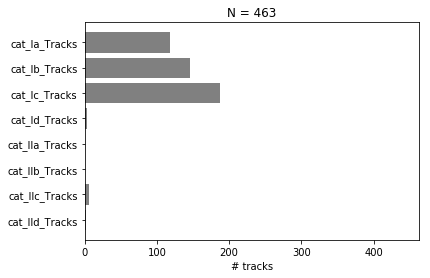

In [93]:
#plot them all

#%----------------------------------------------------------------------------
#    % I. Assign category to each track
#    %----------------------------------------------------------------------------
#    % Categories:
#    % Ia)  Single tracks with valid gaps
#    % Ib)  Single tracks with invalid gaps
#    % Ic)  Single tracks cut at beginning or end
#    % Id)  Single tracks, persistent
#    % IIa) Compound tracks with valid gaps
#    % IIb) Compound tracks with invalid gaps
#    % IIc) Compound tracks cut at beginning or end
#    % IId) Compound tracks, persistent
#    
#    % The categories correspond to index 1-8, in the above order



#data = longtracks
data = data

allTracks = np.unique(data['trackId'].values)
cat_Ia_Tracks = np.unique(data[data['catIdx'] == 1]['trackId'])
cat_Ib_Tracks = np.unique(data[data['catIdx'] == 2]['trackId'])
cat_Ic_Tracks = np.unique(data[data['catIdx'] == 3]['trackId'])
cat_Id_Tracks = np.unique(data[data['catIdx'] == 4]['trackId'])
cat_IIa_Tracks = np.unique(data[data['catIdx'] == 5]['trackId'])
cat_IIb_Tracks = np.unique(data[data['catIdx'] == 6]['trackId'])
cat_IIc_Tracks = np.unique(data[data['catIdx'] == 7]['trackId'])
cat_IId_Tracks = np.unique(data[data['catIdx'] == 8]['trackId'])

categories = [cat_Ia_Tracks,cat_Ib_Tracks,cat_Ic_Tracks,cat_Id_Tracks,cat_IIa_Tracks,cat_IIb_Tracks,cat_IIc_Tracks,cat_IId_Tracks]
categoryLabels = ["cat_Ia_Tracks","cat_Ib_Tracks","cat_Ic_Tracks","cat_Id_Tracks","cat_IIa_Tracks","cat_IIb_Tracks","cat_IIc_Tracks","cat_IId_Tracks"]

categoryFrequency = []
for cat in categories:
    categoryFrequency.append(len(cat))
    
print(categoryFrequency)



# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(categoryFrequency))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(categoryFrequency))
error = np.zeros(len(categoryFrequency))
print(error)

ax.barh(y_pos, categoryFrequency, xerr=error, align='center',
        color='grey', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(categoryLabels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('# tracks')
ax.set_xlim(0,len(allTracks))
ax.set_title('N = '+str(len(allTracks)))